<a href="https://colab.research.google.com/github/alexfreudenberg/ana2workshop/blob/master/Backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grundgerüst für euer neuronales Netzwerk**

In Kernels können Blocks von Code sukzessiv ausgeführt und der Output direkt angezeigt werden. Außerdem könnt ihr eure Vorhersagen direkt zur Challenge hochladen und sehen, wie gut euer Model auf den Testdaten funktioniert.
In diesem Kernel haben wir ein Grundgerüst für ein neuronales Netz vorbereitet, das ihr gleich tunen und verbessern könnt. Zunächst werden wir uns aber die vorliegenden Daten genauer anschauen, um eine Übersicht zu bekommen und zu erkennen, welche Features der Patienten einen hohen Einfluss auf das Vorliegen einer Herzkrankheit haben.

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
s=pd.read_csv("https://raw.githubusercontent.com/alexfreudenberg/ana2workshop/master/test_sol.csv")
warnings.simplefilter("ignore")
import os
import keras
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 




Using TensorFlow backend.


In [0]:
train=pd.read_csv("https://raw.githubusercontent.com/alexfreudenberg/ana2workshop/master/train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/alexfreudenberg/ana2workshop/master/test.csv")

In [0]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
1,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
2,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
3,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
4,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1


Dabei stehen die Abkürzungen der Spalten für die folgenden Informationen: 

> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Schauen wir uns zunächst die Altersverteilung der Patienten an:

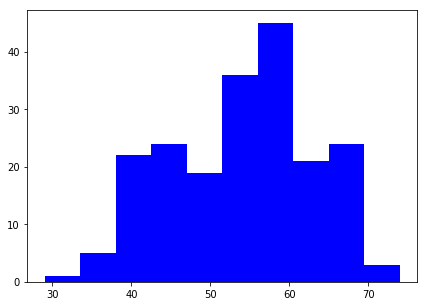

In [0]:
fig,ax=plt.subplots(figsize = [7, 5])
plt.hist(train['age'], color = 'b');

Offensichtlich werden vor allem ältere Menschen mit Herzproblemen ins Krankenhaus eingeliefert. Aber lässt sich das Alter auch gut nutzen, um eine Herzkrankheit zu identfizieren? Dafür betrachten wir im folgenden Plot die Ausprägungen mehrerer Eigenschaften der Patienten und färben bei einer diagnostizierten Krankheit die Punkte grün, die anderen rot.

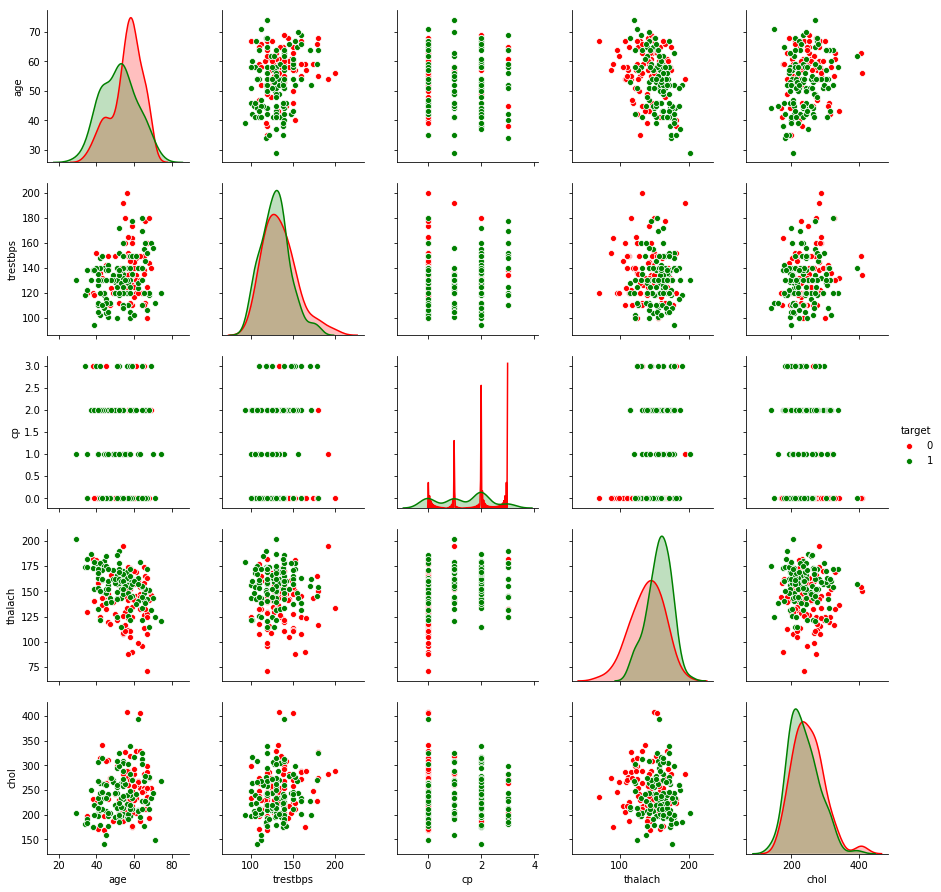

In [0]:
sns.pairplot(train,hue='target',vars=['age','trestbps', 'cp', 'thalach','chol'], kind="scatter",
             palette = {0:"red",1:"green"}, size=2.5);

**Euer Einsatz!**

Im Code unten haben wir das Grundgerüst für ein neuronales Netz angelegt. Eure Aufgabe ist es, die Parameter des Netzes so anzupassen, dass es eine gute Vorhersage für das Vorliegen einer Herzkrankheit liefert. 
Die folgenden Parameter könnten dabei interessant sein:
* die verwendeten **Features**: welche Eigenschaften im Datensatz könnten eine besonders hohe Diagnosekraft haben? Achtung: Mehr Features hinzuzufügen bedeutet nicht automatisch bessere Vorhersagen!
* die **Anzahl der Knotenpunkten** (units) pro Schicht: je mehr Knoten eine Schicht hat, umso breiter wird es. Mehr Knoten führen aber auch zu einer höhren Komplexität im Netz, denn jeder Knoten wird an die Trainingsdaten angepasst!
* die **Anzahl und Art der verwendeten Schichten**: Neue hidden layer könnt ihr zwischen dem Input- und Outputlayer hinzufügen. 
* die verwendeten **Aktivierungsfunktionen**
* die **Initialisierung der Gewichte**: der Parameter kernel_initializer legt die Startgewichte für das Netz fest. "uniform" führt zum Beispiel zu einer Gleichverteilung
* die **Anzahl der Optimierungen** (epochs): je öfter die Gewichte des Netzes optmiert werden, umso genauer werden sie auf die Trainingsdaten angepasst.

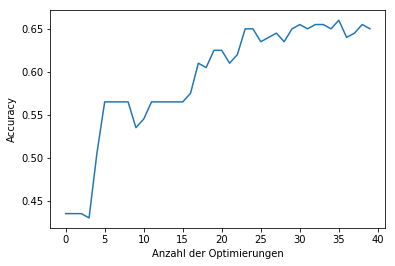

In [0]:
from keras import Sequential
from keras.utils import plot_model
from keras.layers import *
from keras.activations import *
from keras.losses import binary_crossentropy,categorical_hinge

model=Sequential()


features=["age","thalach","trestbps"] #features die für das neuronale Netz verwendet werden
k=len(features) #Anzahl der verwendeten Features -> wird für die erste Schicht des Netzes gebraucht 

model.add(Dense(units = 6,activation="relu",input_shape=(k,)))
model.add(Dense(units = 6,activation="relu"))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'sigmoid'))
# die letzte Schicht des Netzes muss einen Outputknoten haben, damit das Netz die Target-Werte vorhersagt

model.compile("adam",loss=binary_crossentropy,metrics=["accuracy"])
hist=model.fit(x=train[features],y=train["target"],batch_size=32,epochs=40, verbose=0);

plt.plot(hist.history["acc"]);
plt.xlabel("Anzahl der Optimierungen");
plt.ylabel("Accuracy");

Wenn ihr mit eurem Modell zufrieden seid, könnt ihr es mit diesen letzten Zeilen auf die Testdaten anwenden und eure Ergebnisse auf das Leaderboard bringen!

In [0]:
prediction_test = model.predict_classes(test[features])
np.mean(prediction_test==np.array(s))

0.6019417475728155